# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"q="+city+"&appid="+weather_api_key
    # city_url = url+"lat="+str(lats[i])+"&lon="+str(lngs[i])+"&appid="+weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    response = requests.get(city_url).json()

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = datetime.utcfromtimestamp(int(response["dt"])).strftime('%m/%d/%Y')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | mersa matruh
Processing Record 3 of Set 1 | northumberland
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | inirida
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | egilsstadir
Processing Record 10 of Set 1 | colonia
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | buala
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | kataragama
City not found. Skipping...
Processing Record 22

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [51]:
# Kelvin to F
city_data_df["Max Temp"] = city_data_df["Max Temp"]*9/5-459.67

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,38.336,87,97,10.29,TF,08/10/2023
1,mersa matruh,31.3525,27.2453,77.522,71,0,2.57,EG,08/10/2023
2,northumberland,55.2500,-2.0000,58.892,95,13,2.82,GB,08/10/2023
3,bredasdorp,-34.5322,20.0403,49.658,87,0,1.81,ZA,08/10/2023
4,puerto natales,-51.7236,-72.4875,35.978,94,84,1.61,CL,08/10/2023


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.336,87,97,10.29,TF,08/10/2023
1,mersa matruh,31.3525,27.2453,77.522,71,0,2.57,EG,08/10/2023
2,northumberland,55.2500,-2.0000,58.892,95,13,2.82,GB,08/10/2023
3,bredasdorp,-34.5322,20.0403,49.658,87,0,1.81,ZA,08/10/2023
4,puerto natales,-51.7236,-72.4875,35.978,94,84,1.61,CL,08/10/2023


### Create the Scatter Plots Requested

#### Temperature Vs. Latitude

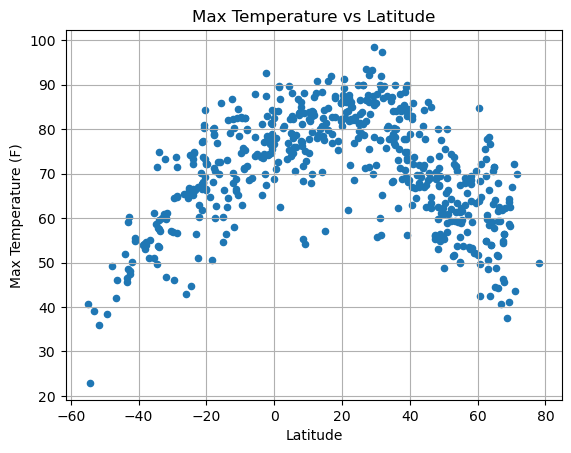

In [54]:
# Build scatter plot for latitude vs. temperature
fig = city_data_df.plot.scatter(y="Max Temp", x="Lat", title = "Max Temperature vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Humidity Vs. Latitude

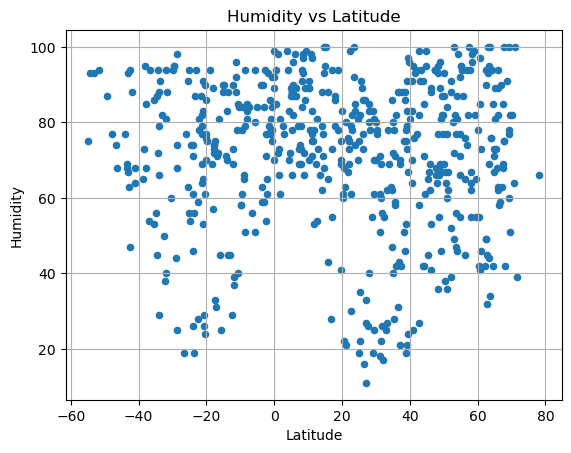

In [55]:
# Build the scatter plots for latitude vs. humidity
fig = city_data_df.plot.scatter(y="Humidity", x="Lat", title = "Humidity vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Cloudiness Vs. Latitude

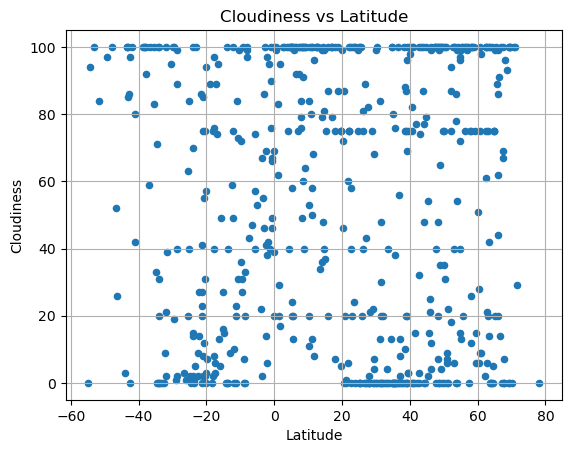

In [56]:
# Build the scatter plots for latitude vs. humidity
fig = city_data_df.plot.scatter(y="Cloudiness", x="Lat", title = "Cloudiness vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Wind Speed Plot vs. Latitude

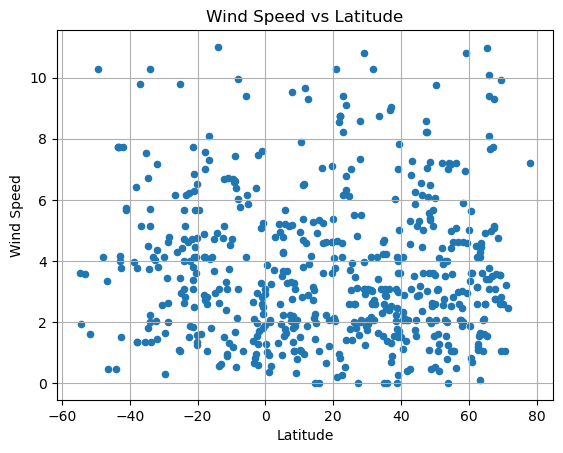

In [57]:
# Build the scatter plots for latitude vs. humidity
fig = city_data_df.plot.scatter(y="Wind Speed", x="Lat", title = "Wind Speed vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mersa matruh,31.3525,27.2453,77.522,71,0,2.57,EG,08/10/2023
2,northumberland,55.2500,-2.0000,58.892,95,13,2.82,GB,08/10/2023
5,inirida,3.8653,-67.9239,73.256,99,100,1.32,CO,08/10/2023
6,isafjordur,66.0755,-23.1240,44.330,82,44,3.40,IS,08/10/2023
8,egilsstadir,65.2653,-14.3948,44.510,81,20,1.54,IS,08/10/2023


In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.336,87,97,10.29,TF,08/10/2023
3,bredasdorp,-34.5322,20.0403,49.658,87,0,1.81,ZA,08/10/2023
4,puerto natales,-51.7236,-72.4875,35.978,94,84,1.61,CL,08/10/2023
7,hermanus,-34.4187,19.2345,53.798,72,0,3.72,ZA,08/10/2023
10,west island,-12.1568,96.8225,82.382,69,75,6.69,CC,08/10/2023


In [60]:
# Define a function to create Linear Regression plots
# Northern DFs
n_r_temp = (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
n_r_hum = (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
n_r_cloud = (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
n_r_wind = (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Southern DFs
s_r_temp = (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
s_r_hum = (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
s_r_cloud = (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
s_r_wind = (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

###  Temperature vs. Latitude Linear Regression Plot

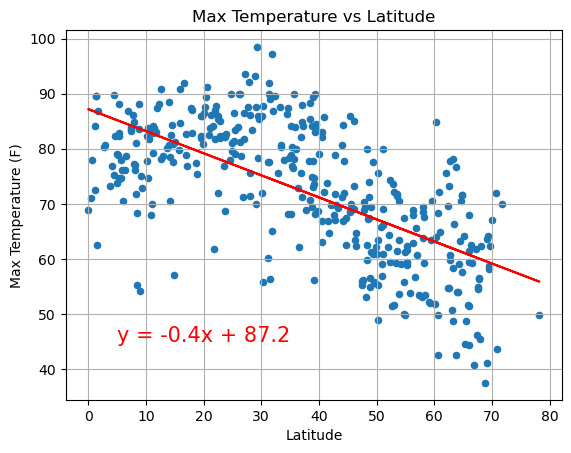

The r-value is: -0.6535963227962496


In [61]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = northern_hemi_df.plot.scatter(y="Max Temp", x="Lat", title = "Max Temperature vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Generate y regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(5,45),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

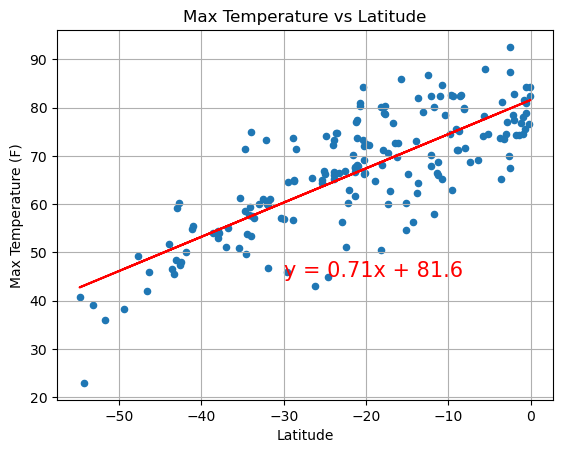

The r-value is: 0.7885521356312816


In [62]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = southern_hemi_df.plot.scatter(y="Max Temp", x="Lat", title = "Max Temperature vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Generate y regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(-30,45),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the northern hempisphere, there is a negative relationship between Max Temp and Latitude. In the southern hempisphere, there is a positive relationship between Max Temp and Latitude. This makes sense because the hottest area is lattiude 0 (equator)

### Humidity vs. Latitude Linear Regression Plot

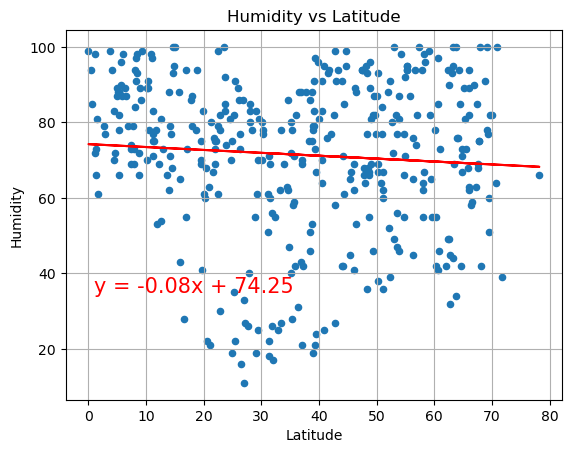

The r-value is: -0.07455500309006023


In [73]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = northern_hemi_df.plot.scatter(y="Humidity", x="Lat", title = "Humidity vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Generate y regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(1,35),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

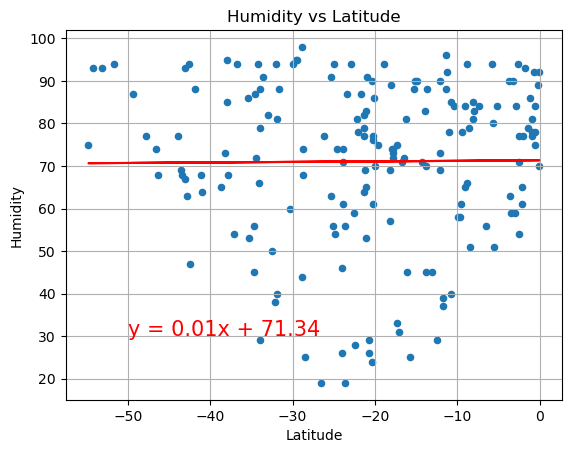

The r-value is: 0.008768263876632206


In [64]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = southern_hemi_df.plot.scatter(y="Humidity", x="Lat", title = "Humidity vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Generate y regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(-50,30),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** There is no linear relationship between humidity and latitude. The charts are quite evenly dispersed with their data, and the r-values are very weak.

### Cloudiness vs. Latitude Linear Regression Plot

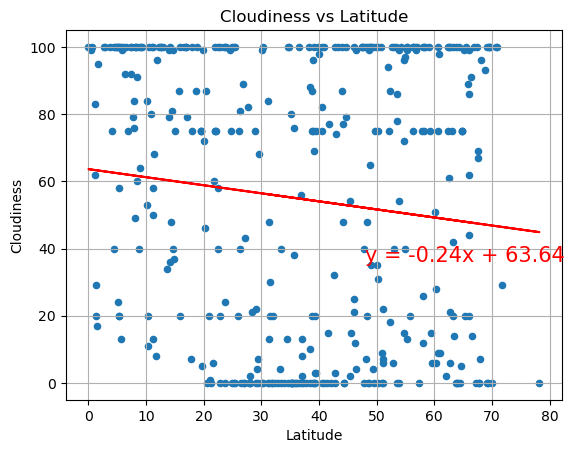

The r-value is: -0.11754178070959156


In [72]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = northern_hemi_df.plot.scatter(y="Cloudiness", x="Lat", title = "Cloudiness vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Generate y regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(48,36),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

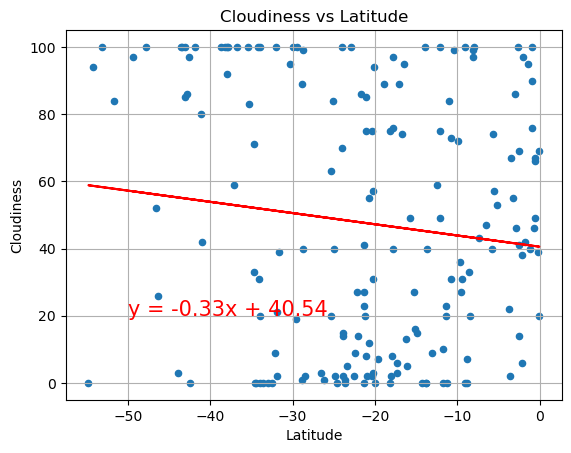

The r-value is: -0.12016785125298825


In [66]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = southern_hemi_df.plot.scatter(y="Cloudiness", x="Lat", title = "Cloudiness vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Generate y regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(-50,20),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** For both hemispheres, there is a slight negative relationship between cloudiness and latitude. However, the correlation is extremely weak and most likely not statistically significant.

### Wind Speed vs. Latitude Linear Regression Plot

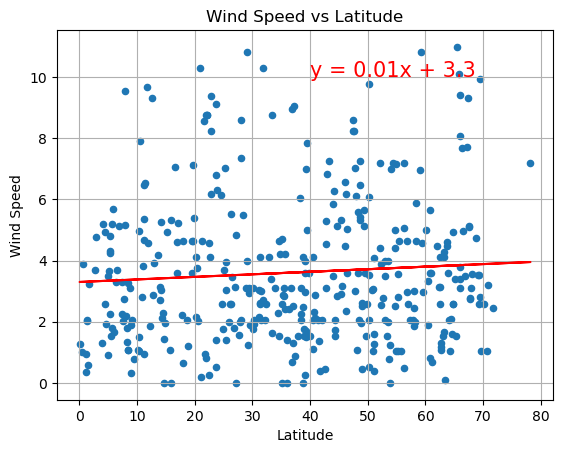

The r-value is: 0.07009544767291812


In [71]:
# Northern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = northern_hemi_df.plot.scatter(y="Wind Speed", x="Lat", title = "Wind Speed vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Generate y regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(40,10),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

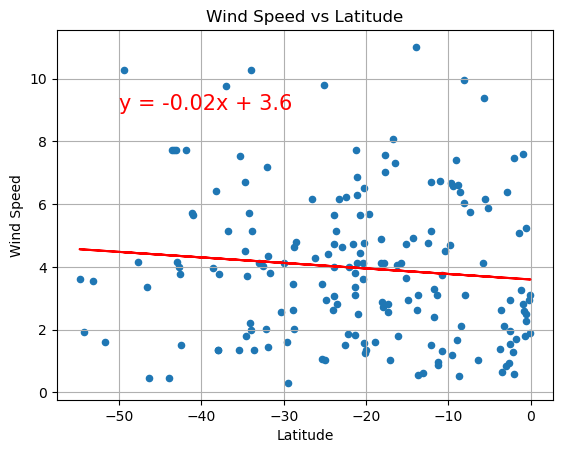

The r-value is: -0.10125717932675013


In [69]:
# Southern Hemisphere
# Build scatter plot for latitude vs. temperature
fig = southern_hemi_df.plot.scatter(y="Wind Speed", x="Lat", title = "Wind Speed vs Latitude", grid = True)

# Incorporate the other graph properties
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Generate Statistical Analysis Figures
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Generate y regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Plot Regression Line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Add Equation
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(equation,(-50,9),fontsize=15,color="red")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** In the northern hempisphere, there is a slight positve relationship between Wind Speed and Latitude. In the southern hempisphere, there is a slight negative relationship between Wind Speed and Latitude. However, the correlation is very weak and most likely not statistically significant.